## Predict which passengers are transported to an alternate dimension

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
train_data = pd.read_csv(r"D:\Datasets\spaceship-titanic\train.csv")
test_data = pd.read_csv(r"D:\Datasets\spaceship-titanic\test.csv")

In [135]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [136]:
rent = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for i in rent:
    train_data[i].fillna(0,inplace = True)
    test_data[i].fillna(0,inplace = True)
    


In [137]:
train_data['Amount'] = train_data['RoomService']+train_data['FoodCourt']+train_data['ShoppingMall']+train_data['Spa']+train_data['VRDeck']

In [138]:
test_data['Amount'] = test_data['RoomService']+test_data['FoodCourt']+test_data['ShoppingMall']+test_data['Spa']+test_data['VRDeck']

In [139]:
train_data.groupby('CryoSleep')['Amount'].sum()

CryoSleep
False    12228502.0
True            0.0
Name: Amount, dtype: float64

In [140]:
#Converting all the missing values in CryoSpleep to False where Amount is greater than 1
train_data.loc[(train_data.CryoSleep.isnull()) & (train_data.Amount == 0), 'CryoSleep'] = True
train_data.loc[(train_data.CryoSleep.isnull()) & (train_data.Amount!= 0), 'CryoSleep'] = False

In [141]:
test_data.loc[(test_data.CryoSleep.isnull()) & (test_data.Amount == 0), 'CryoSleep'] = True
test_data.loc[(test_data.CryoSleep.isnull()) & (test_data.Amount!= 0), 'CryoSleep'] = False

In [142]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Amount            0
dtype: int64

In [143]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [144]:
train_data.shape

(8693, 15)

In [145]:
train_data.groupby('HomePlanet')['Transported'].count()


HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: Transported, dtype: int64

In [146]:
train_data[train_data['HomePlanet'].isnull()]['Transported'].value_counts()

True     103
False     98
Name: Transported, dtype: int64

Homeplanet null values can be removed as it doesn't look like it affects the target, 

In [147]:
train_data[train_data['Age'].isnull()].isnull().sum()

PassengerId       0
HomePlanet        2
CryoSleep         0
Cabin             4
Destination       3
Age             179
VIP               6
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              3
Transported       0
Amount            0
dtype: int64

In [148]:
print(train_data['Age'].mean())

28.82793046746535


In [149]:
#Age mean values are resolved
train_data['Age'].fillna(train_data['Age'].mean(),inplace = True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace = True)

In [150]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Amount            0
dtype: int64

In [151]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [152]:
# As approximately 69.5% people are going to TRAPPIST-1e , we are taking the same value for the null values in that column

train_data['Destination'].fillna('TRAPPIST-1e' ,inplace = True)
test_data['Destination'].fillna('TRAPPIST-1e' ,inplace = True)

In [153]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Amount            0
dtype: int64

In [154]:
#removing Name column as it vill be impossible to predict and our model will not need Name column. However, for timebeing, saving it on another variable
train_name, test_name = train_data['Name'].values , test_data['Name'].values
train_data.drop('Name',axis = 1, inplace = True)
test_data.drop('Name',axis = 1, inplace = True)

In [155]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Amount            0
dtype: int64

In [156]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Amount            0
dtype: int64

In [159]:
train_data.groupby('VIP')['Age'].mean()

VIP
False    28.643518
True     37.406171
Name: Age, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

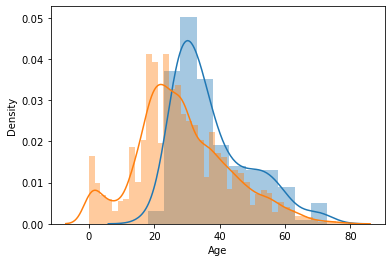

In [160]:
sns.distplot(train_data['Age'][train_data['VIP']==True])
sns.distplot(train_data['Age'][train_data['VIP']==False])


(array([ 499.,  219.,  522., 1506., 1418., 1320.,  874.,  852.,  517.,
         340.,  290.,  200.,   84.,   33.,   19.]),
 array([ 0.        ,  5.26666667, 10.53333333, 15.8       , 21.06666667,
        26.33333333, 31.6       , 36.86666667, 42.13333333, 47.4       ,
        52.66666667, 57.93333333, 63.2       , 68.46666667, 73.73333333,
        79.        ]),
 <BarContainer object of 15 artists>)

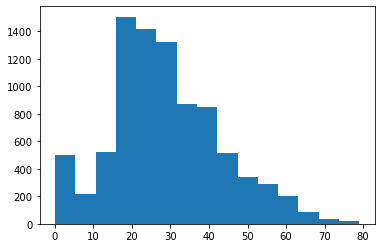

In [161]:
# Coverting Age from numeric to classes
plt.hist(train_data['Age'],bins = 15)

In [162]:
def cal(number):
    if number<16:
        return "Kid"
    elif number>=16 and number<=30:
        return "Young"
    elif number>=30 and number<51:
        return "Adult"
    else:
        return "Old"

In [163]:
train_data['Age']=train_data['Age'].apply(cal)
test_data['Age']=test_data['Age'].apply(cal)

In [164]:
train_data['Age'].value_counts()

Young    4042
Adult    2674
Kid      1240
Old       737
Name: Age, dtype: int64

In [165]:
train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [166]:
#removing missing values from VIP column
train_data['VIP'].fillna(False,inplace = True)

In [167]:
train_data['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [168]:
test_data['VIP'].fillna(False,inplace = True)

In [169]:
test_data['VIP'].value_counts()

False    4203
True       74
Name: VIP, dtype: int64

In [170]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Amount            0
dtype: int64

In [171]:
train_data.drop('Cabin',axis = 1,inplace=True)
test_data.drop('Cabin',axis = 1,inplace=True)

In [172]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Amount            0
dtype: int64

In [173]:
test_data['HomePlanet'].isnull().sum()

87

In [174]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [175]:
train_data[train_data['HomePlanet'].isnull()]['Destination'].value_counts()

TRAPPIST-1e      154
55 Cancri e       31
PSO J318.5-22     16
Name: Destination, dtype: int64

In [176]:
train_data['HomePlanet'].fillna('Earth',inplace = True)
test_data['HomePlanet'].fillna('Earth',inplace = True)

In [177]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Amount          0
dtype: int64

In [178]:

train = train_data.drop(['PassengerId','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Amount'],axis = 1)
test = test_data.drop(['PassengerId','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Amount'],axis = 1)

In [179]:
train.shape, test.shape

((8693, 6), (4277, 5))

In [180]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,Europa,False,TRAPPIST-1e,Adult,False,False
1,Earth,False,TRAPPIST-1e,Young,False,True
2,Europa,False,TRAPPIST-1e,Old,True,False
3,Europa,False,TRAPPIST-1e,Adult,False,False
4,Earth,False,TRAPPIST-1e,Young,False,True


In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [182]:
train['Transported'] = le.fit_transform(train['Transported'])

In [183]:
train = pd.get_dummies(train,columns = ['HomePlanet','CryoSleep','Destination','Age','VIP'],drop_first = True)
test = pd.get_dummies(test,columns = ['HomePlanet','CryoSleep','Destination','Age','VIP'],drop_first = True)

In [184]:
train.head()

,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age_Kid,Age_Old,Age_Young,VIP_True
0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0


In [185]:
feature = train.drop(['Transported'],axis = 1)
target = train['Transported'].values

In [186]:
from sklearn.model_selection import train_test_split as split

In [187]:
X_train,X_test,y_train,y_test = split(feature,target,train_size=0.8, random_state = 1)

In [188]:
#added entropy from gini
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='best',min_samples_leaf=25)

In [189]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=25)

In [190]:
y_pred = clf.predict(X_test)

In [191]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.7274295572167913

In [192]:
param_dist = {"criterion":["gini", "entropy", "log_loss"],
             "splitter":["best", "random"],
             "max_depth":[1,3,5,7,9,11,None],
             "min_samples_split":[2,4,6,8,100],}

In [193]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf,param_grid=param_dist,cv = 10,n_jobs = -1)

xgrid.fit(X_train,y_train)

grid.best_score_

In [195]:
Xf = test
yf = clf.predict(Xf)

In [196]:
yf.shape , test_data['PassengerId'].shape

((4277,), (4277,))

In [197]:
final = pd.DataFrame()

In [198]:
final['PassengerId'] = test_data['PassengerId']
final['Transported'] = yf

In [199]:
final.replace({0:False,1:True},inplace = True)

In [200]:
final.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [66]:
final.to_csv('SubmissionTitanicSpaceship.csv',index = False)

In [266]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_features=None,max_depth=5,criterion='entropy',bootstrap=True)

In [267]:
%%time
rfc.fit(X_train,y_train)

Wall time: 830 ms


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=None)

In [268]:
y_pred3 = rfc.predict(X_test)

In [269]:
accuracy_score(y_pred3,y_test)

0.7280046003450259

In [271]:
yf = rfc.predict(test)

In [272]:
final = pd.DataFrame()
final['PassengerId'] = test_data['PassengerId']
final['Transported'] = yf
final.replace({0:False,1:True},inplace = True)
final.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [273]:
final.to_csv('SubmissionTitanicSpaceship2.csv',index = False)

In [274]:
from xgboost import XGBClassifier
xgv = XGBClassifier()

In [275]:
xgv.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [276]:
y_pred3 = xgv.predict(X_test)
accuracy_score(y_pred3,y_test)

0.7239792984473835

In [280]:
train.head()

,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Age_Kid,Age_Old,Age_Young,VIP_True
0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0


In [287]:
filter(train_data, "RoomService" == 0)

TypeError: 'bool' object is not iterable